In [1]:
#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read excel file
file_path = r'D:\US REsearch\EC TSLA QQQ.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)


Regression Results for EC Return:
                            OLS Regression Results                            
Dep. Variable:              EC Return   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     343.9
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           3.57e-72
Time:                        13:53:50   Log-Likelihood:                 5762.6
No. Observations:                2581   AIC:                        -1.152e+04
Df Residuals:                    2579   BIC:                        -1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.

<Figure size 1200x600 with 0 Axes>

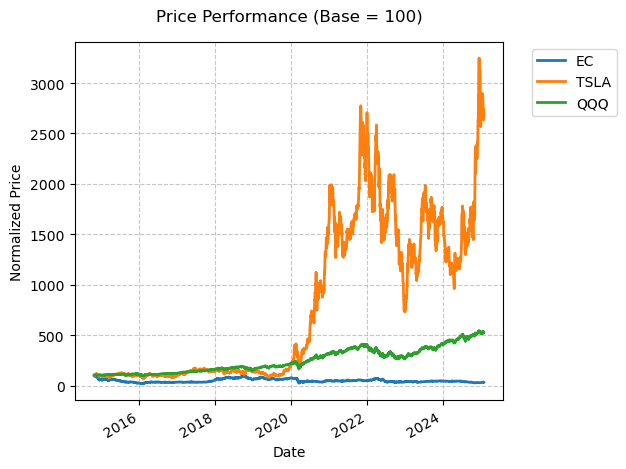


Additional Statistics:

Correlation Matrix:
          EC    TSLA     QQQ
EC    1.0000 -0.2192 -0.1648
TSLA -0.2192  1.0000  0.8913
QQQ  -0.1648  0.8913  1.0000

Volatility (Standard Deviation of Returns):
EC Return      0.4386
TSLA Return    0.5692
QQQ Return     0.2169
dtype: float64


In [2]:
# Calculate daily returns
df['EC Return'] = df['EC'].pct_change()
df['TSLA Return'] = df['TSLA'].pct_change()
df['QQQ Return'] = df['QQQ'].pct_change()

# Define return columns
return_columns = ['EC Return', 'TSLA Return', 'QQQ Return']

# Calculate beta relative to QQQ
def calculate_betas(df):
    betas = {}
    market_return = df['QQQ Return']
    
    for col in return_columns[:-1]:  # Exclude QQQ itself
        model = sm.OLS(df[col].dropna(), sm.add_constant(market_return.dropna()))
        results = model.fit()
        betas[col] = results.params.iloc[1]
        
        # Print full regression results
        print(f"\nRegression Results for {col}:")
        print(results.summary())
    
    return pd.Series(betas)

# Calculate and print betas
betas = calculate_betas(df)
print("\nBetas relative to QQQ:")
print(betas.round(4))

# Create trend line plot
plt.figure(figsize=(12, 6))

# Normalize prices to 100
normalized_df = df[['EC', 'TSLA', 'QQQ']].div(
    df[['EC', 'TSLA', 'QQQ']].iloc[0]) * 100

# Plot each line
normalized_df.plot(linewidth=2)

# Customize the plot
plt.title('Price Performance (Base = 100)', fontsize=12, pad=15)
plt.ylabel('Normalized Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculate and print additional statistics
print("\nAdditional Statistics:")
print("\nCorrelation Matrix:")
correlation_matrix = df[['EC', 'TSLA', 'QQQ']].corr()
print(correlation_matrix.round(4))

print("\nVolatility (Standard Deviation of Returns):")
volatility = df[return_columns].std() * np.sqrt(252)  # Annualized
print(volatility.round(4))